# SAT & ACT participation rate Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

With the new format for SAT released in March 2016. In this notebook we will be looking at the 2017 and 2018 participation rates by state for both SAT and ACT, to gain insights into which state would benefit most from investments to improve the SAT participation rates.

## Executive Summary

The ACT participation has been surpassing the SAT in participation in recent years. With the new SAT format released in 2016, in an attempt to bolster their test. Here we take a look at SAT and ACT participation and scoring data by state in 2017 and 2018, to look at possible ways to increase SAT participation moving forward.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#setting options for both pandas and numpy to show decimals up to 4 places
pd.set_option('display.precision',4)
np.set_printoptions(precision=4)

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Defining a dict to hold the filenames.
# Reason for this is for the ease of changing the filenames and path,
# without changing any other codes
data_files = {
    'sat_2017' : '../data/sat_2017.csv',
    'act_2017' : '../data/act_2017.csv',
    'sat_2018' : '../data/sat_2018.csv',
    'act_2018' : '../data/act_2018_updated.csv'
}

# Loading the information into the respective dataframe
sat_2017 = pd.read_csv(data_files['sat_2017'])
act_2017 = pd.read_csv(data_files['act_2017'])
sat_2018 = pd.read_csv(data_files['sat_2018'])
act_2018 = pd.read_csv(data_files['act_2018'])

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# First 10 rows data for SAT 2017 and info of the dataframe
display(sat_2017.head(10))

# check info for the dataframe at the same time
sat_2017.info()

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [4]:
# First 10 rows data for ACT 2017 and info of the dataframe
display(act_2017.head(10))

# check info for the dataframe at the same time
act_2017.info()

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

<span style="color:darkblue">
<h3> SAT 2017 Data </h3>

| Column | Name  | Data Type | Description                                                              |
|:-:|:--|:-: |:--|
|   0    | State | Object    | Contains 51 states in America, with no Null values. |
|   1    | Participation | Object | Contains 51 participation rate in percentage, with no Null values. Would have to remove the % at the end of the rates to convert the values to float/int. |
|   2    | Evidence-Based Reading and Writing | int64 | Contains 51 average score for the Evidence-Based Reading and Writing pert of the test, with no Null values. |
|   3    | Math | int64 | Contains 51 average score for the Math part of the test, with no Null values. |
|   4    | Total | int64 | Contains 51 average combined score for the 2 parts above, with no Null values.  |

    


<h3> ACT 2017 Data </h3>
    
| Column | Name  | Data Type | Description                                                              |
|:-:|:--|:-: |:--|
|   0    | State | Object    | Contains 51 states in America and National (assumation that this is a total average). There are no Null values in this column. |
|   1    | Participation | Object | Contains 52 participation rate in percentage, with no Null values. Would have to remove the % at the end of the rates to convert the values to float/int. |
|   2    | English | float64 | Contains 52 average score for the English part of the test, with no Null values. |
|   3    | Math | float64 | Contains 52 average score for the Math part of the test, with no Null values. |
|   4    | Reading | float64 | Contains 52 average score for the Reading part of the test, with no Null values.  |
|   5    | Science | float64 | Contains 52 average score for the Science part of the test, with no Null values. |
|   6    | Composite | object | Contains 52 average score for the 4 parts above, with no Null values. Will have to investigate further on why the data type is Object |

</span> 

#### 4a. Does the data look complete? 

Answer:

Some data type conversion are required, other than that the data looks clean and complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
sat_2017.describe()

Evidence-Based Reading and Writing      Math      Total
count                             51.0000   51.0000    51.0000
mean                             569.1176  547.6275  1126.0980
std                               45.6669   84.9091    92.4948
min                              482.0000   52.0000   950.0000
25%                              533.5000  522.0000  1055.5000
50%                              559.0000  548.0000  1107.0000
75%                              613.0000  599.0000  1212.0000
max                              644.0000  651.0000  1295.0000

In [6]:
act_2017.describe()

English     Math  Reading  Science
count  52.0000  52.0000  52.0000  52.0000
mean   20.9192  21.1731  22.0019  21.0404
std     2.3321   1.9636   2.0487   3.1511
min    16.3000  18.0000  18.1000   2.3000
25%    19.0000  19.4000  20.4750  19.9000
50%    20.5500  20.9000  21.7000  21.1500
75%    23.3000  23.1000  24.1250  22.5250
max    25.5000  25.3000  26.0000  24.9000

Answer: <br>
The min score for SAT Math looks off, upon checking with the source found that it was a typo.
The Math value for Maryland should be 524 instead of 52.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Correcting the typo for 2017 SAT Math score for Maryland 
sat_2017.loc[sat_2017['State']=='Maryland', 'Math'] = 524

In [8]:
# Min score for ACT science looks too low, checked and found it's an error
act_2017.loc[act_2017['State']=='Maryland', 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: <br>
The Participation feature for both SAT and ACT are objects, this is due to the % at the end of each values.
The Composite feature for ACT should be a float64, further investigation done below.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

#### lambda function conv_pct

In [11]:
# lambda function to convert participation rate from string to float
conv_pct = lambda _ : int(_.replace("%",""))

In [12]:
# Using map to change the participation rate for SAT 2017 dataframe
sat_2017['Participation'] = sat_2017['Participation'].map(conv_pct)

# Using map to change the participation rate for ACT 2017 dataframe
act_2017['Participation'] = act_2017['Participation'].map(conv_pct)

In [13]:
# Checking both SAT and ACT dataframe after converting participation rate
display(sat_2017.head())
display(act_2017.head())

State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama              5                                 593   572   1165
1      Alaska             38                                 547   533   1080
2     Arizona             30                                 563   553   1116
3    Arkansas              3                                 614   594   1208
4  California             53                                 531   524   1055

State  Participation  English  Math  Reading  Science Composite
0  National             60     20.3  20.7     21.4     21.0      21.0
1   Alabama            100     18.9  18.4     19.7     19.4      19.2
2    Alaska             65     18.7  19.8     20.4     19.9      19.8
3   Arizona             62     18.6  19.8     20.1     19.8      19.7
4  Arkansas            100     18.9  19.0     19.7     19.5      19.4

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
# Checking the info for both sat 2017 and act 2017
display(sat_2017.dtypes)
display(act_2017.dtypes)
# Now both Participation rates should be int64

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [15]:
# From the information above, the datatype of Composite should not be an object
act_2017['Composite'].unique()
# With this function we can see that there is a value 20.2x that is causing the problem

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [16]:
# Function to convert in_val into float
# if in_val contains x at the end, remove x and convert to float
def conv(in_val):
    """ 
    Function to convert in_val into float. 
  
    Parameters: 
		in_val (str): string passed in to be converted into float 
  
    Returns: 
		float: float value of the string  
  
    """
    try:
        return float(in_val)
    except:
        return float(in_val.replace('x',''))

In [17]:
# Using the conv function above in map to convert the Composite value to float
act_2017['Composite'] = act_2017['Composite'].map(conv)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
# Checking the data type after conversion
act_2017['Composite'].dtype

dtype('float64')

- Display the data types again to confirm they are correct.

In [19]:
# Checking the info for both sat 2017 and act 2017
display(sat_2017.dtypes)
display(act_2017.dtypes)
# Now all the dat types looks right

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

#### lambda function col_name

In [20]:
# lambda function to append a tag to the column name if column name is not 'State'
col_name = lambda col, tag : col if col == 'State' else tag + col 

In [21]:
# Rename sat_2017 dataframe columns using lambda function
sat_2017.columns = sat_2017.columns.map(lambda x : col_name(x,'SAT_'))

In [22]:
# Rename act_2017 dataframe columns using lambda function
act_2017.columns = act_2017.columns.map(lambda x : col_name(x,'ACT_'))

In [23]:
# Check on the headers after mapping the lambda fucntion
display(sat_2017.head(2))
display(act_2017.head(2))

State  SAT_Participation  SAT_Evidence-Based Reading and Writing  \
0  Alabama                  5                                     593   
1   Alaska                 38                                     547   

   SAT_Math  SAT_Total  
0       572       1165  
1       533       1080

State  ACT_Participation  ACT_English  ACT_Math  ACT_Reading  \
0  National                 60         20.3      20.7         21.4   
1   Alabama                100         18.9      18.4         19.7   

   ACT_Science  ACT_Composite  
0         21.0           21.0  
1         19.4           19.2

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**


<span style="color:darkblue">
<h3> SAT 2017 Data </h3>

| Feature | Type  | Dataset | Description |
|:--|:-:|:-: |:--|
| State | object | SAT | Contains 51 states in America, with no Null values. |
| SAT_Participation | int | SAT | Contains 51 participation rate in percentage, with no Null values. Converted participation rates to int, ranging 1 to 100.  |
| SAT_Evidence-Based Reading and Writing    | int | SAT | Contains 51 average score for the Evidence-Based Reading and Writing pert of the test. Values are rounded to whole numbers with no Null values. |
| SAT_Math    | int | SAT | Contains 51 average score for the Math part of the test. Values are rounded to whole numbers with no Null values. |
| SAT_Total    | int | SAT | Contains 51 average combined score for the 2 parts above. Values are rounded to whole numbers with no Null values.  |

    


<h3> ACT 2017 Data </h3>
    
| Feature | Type  | Dataset | Description |
|:--|:-:|:-: |:--|
| State | object | ACT | Contains 51 states in America and National (assumation that this is a total average). There are no Null values in this column. |
| ACT_Participation | int | ACT | Contains 52 participation rate in percentage, with no Null values. Converted participation rates to int, ranging 1 to 100. |
| ACT_English | float | ACT | Contains 52 average score for the English part of the test. Values are rounded to 1 decimal place with no Null values. |
| ACT_Math | float | ACT | Contains 52 average score for the Math part of the test. Values are rounded to 1 decimal place with no Null values. |
| ACT_Reading | float | ACT | Contains 52 average score for the Reading part of the test. Values are rounded to 1 decimal place with no Null values.  |
| ACT_Science | float | ACT | Contains 52 average score for the Science part of the test. Values are rounded to 1 decimal place with no Null values. |
| ACT_Composite | float | ACT | Contains 52 average score for the 4 parts above. Values are rounded to 1 decimal place with no Null values. |

</span> 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
# filter/remove the National row from act_2017 dataframe
act_2017 = act_2017[act_2017['State']!='National']

In [25]:
# Now both SAT and ACT 2017 data frame has the same number of rows
display(sat_2017.shape)
display(act_2017.shape)

(51, 5)

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
# Merge SAT and ACT data frame by State
merged_2017 = pd.merge(sat_2017, act_2017, on='State')

In [27]:
# looking at the shape and headers to check if merge is successful
display(merged_2017.shape)
merged_2017.head()

(51, 11)

State  SAT_Participation  SAT_Evidence-Based Reading and Writing  \
0     Alabama                  5                                     593   
1      Alaska                 38                                     547   
2     Arizona                 30                                     563   
3    Arkansas                  3                                     614   
4  California                 53                                     531   

   SAT_Math  SAT_Total  ACT_Participation  ACT_English  ACT_Math  ACT_Reading  \
0       572       1165                100         18.9      18.4         19.7   
1       533       1080                 65         18.7      19.8         20.4   
2       553       1116                 62         18.6      19.8         20.1   
3       594       1208                100         18.9      19.0         19.7   
4       524       1055                 31         22.5      22.7         23.1   

   ACT_Science  ACT_Composite  
0         19.4           19.2  
1         19.9           19.8  
2         19.8           19.7  
3         19.5           19.4  
4         22.2           22.8

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
# Saving merged dataframe into csv file
merged_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning


Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.


### SAT 2018 Data
- Change participation to float
- Change column names

In [29]:
# First 5 rows data for SAT 2018 and info of the dataframe
display(sat_2018.head())

# displaying info for the dataframe
sat_2018.info()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [30]:
# Changing sat_2018 Participation rate from object to float, using map and lambda pct
sat_2018['Participation'] = sat_2018['Participation'].map(conv_pct)

lambda function conv_pct was defined here: [lambda function conv_pct](#lambda-function-conv_pct)

In [31]:
#Rename sat_2018 dataframe columns using lamdba function
sat_2018.columns = sat_2018.columns.map(lambda x : col_name(x,'SAT_'))

lambda function col_name was defined here: [lambda function col_name](#lambda-function-col_name)

In [32]:
# First 5 rows data for SAT 2018 and info of the dataframe
display(sat_2018.head())

# check data types
sat_2018.dtypes

State  SAT_Participation  SAT_Evidence-Based Reading and Writing  \
0     Alabama                  6                                     595   
1      Alaska                 43                                     562   
2     Arizona                 29                                     577   
3    Arkansas                  5                                     592   
4  California                 60                                     540   

   SAT_Math  SAT_Total  
0       571       1166  
1       544       1106  
2       572       1149  
3       576       1169  
4       536       1076

State                                     object
SAT_Participation                          int64
SAT_Evidence-Based Reading and Writing     int64
SAT_Math                                   int64
SAT_Total                                  int64
dtype: object

### ACT 2018 Data
- Change participation to float
- Change column names

In [33]:
# First 5 rows data for ACT 2018 and info of the dataframe
display(act_2018.head())

# displaying info for the dataframe
act_2018.info()

State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  
4                   22.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [34]:
# Renaming the column names for ACT 2018
# lambda function used for generating of new column names
act_col = lambda x : 'ACT_'+x[8:-6] if 'Average' in x else 'ACT_Participation'

In [35]:
# Dictionary comphension for the new column names
new_col = { col : act_col(col) for col in act_2018.columns[1:] }

In [36]:
# Renaming ACT 2018 column names
act_2018.rename(columns=new_col, inplace=True)

In [37]:
# Changing sat_2018 Participation rate from object to float, using map and lambda pct
act_2018['ACT_Participation'] = act_2018['ACT_Participation'].map(lambda x : int(x))

In [38]:
# First 5 rows data for SAT 2018 and info of the dataframe
display(act_2018.head())

# check data types
act_2018.dtypes

State  ACT_Participation  ACT_Composite  ACT_English  ACT_Math  \
0     Alabama                100           19.1         18.9      18.3   
1      Alaska                 33           20.8         19.8      20.6   
2     Arizona                 66           19.2         18.2      19.4   
3    Arkansas                100           19.4         19.1      18.9   
4  California                 27           22.7         22.5      22.5   

   ACT_Reading  ACT_Science  
0         19.6         19.0  
1         21.6         20.7  
2         19.5         19.2  
3         19.7         19.4  
4         23.0         22.1

State                 object
ACT_Participation      int64
ACT_Composite        float64
ACT_English          float64
ACT_Math             float64
ACT_Reading          float64
ACT_Science          float64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
# Merge 2018 SAT and ACT data frame by State
merged_2018 = pd.merge(sat_2018, act_2018, on='State')

In [40]:
# Checking the shape after merging sat and act 2018 dataframes
merged_2018.shape

(51, 11)

In [41]:
#Rename merged_2018 dataframe columns using lamdba function
merged_2018.columns = merged_2018.columns.map(lambda x : col_name(x,'2018_'))

In [42]:
#Rename merged_2017 dataframe columns using lamdba function to prefix with 2017
merged_2017.columns = merged_2017.columns.map(lambda x : col_name(x,'2017_'))

In [43]:
#Combine both years dataframes
final_df = pd.merge(merged_2017, merged_2018, on='State')
final_df.head()

State  2017_SAT_Participation  \
0     Alabama                       5   
1      Alaska                      38   
2     Arizona                      30   
3    Arkansas                       3   
4  California                      53   

   2017_SAT_Evidence-Based Reading and Writing  2017_SAT_Math  2017_SAT_Total  \
0                                          593            572            1165   
1                                          547            533            1080   
2                                          563            553            1116   
3                                          614            594            1208   
4                                          531            524            1055   

   2017_ACT_Participation  2017_ACT_English  2017_ACT_Math  2017_ACT_Reading  \
0                     100              18.9           18.4              19.7   
1                      65              18.7           19.8              20.4   
2                      62              18.6           19.8              20.1   
3                     100              18.9           19.0              19.7   
4                      31              22.5           22.7              23.1   

   2017_ACT_Science  ...  2018_SAT_Participation  \
0              19.4  ...                       6   
1              19.9  ...                      43   
2              19.8  ...                      29   
3              19.5  ...                       5   
4              22.2  ...                      60   

   2018_SAT_Evidence-Based Reading and Writing  2018_SAT_Math  2018_SAT_Total  \
0                                          595            571            1166   
1                                          562            544            1106   
2                                          577            572            1149   
3                                          592            576            1169   
4                                          540            536            1076   

   2018_ACT_Participation  2018_ACT_Composite  2018_ACT_English  \
0                     100                19.1              18.9   
1                      33                20.8              19.8   
2                      66                19.2              18.2   
3                     100                19.4              19.1   
4                      27                22.7              22.5   

   2018_ACT_Math  2018_ACT_Reading  2018_ACT_Science  
0           18.3              19.6              19.0  
1           20.6              21.6              20.7  
2           19.4              19.5              19.2  
3           18.9              19.7              19.4  
4           22.5              23.0              22.1  

[5 rows x 21 columns]

In [44]:
# Renaming SAT_Evidence-Based Reading and Writing for easy reading
final_df = final_df.rename(columns={"2017_SAT_Evidence-Based Reading and Writing": "2017_SAT_EBRW",\
                         "2018_SAT_Evidence-Based Reading and Writing": "2018_SAT_EBRW"})

In [45]:
#Saving merged dataframe into csv file
final_df.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [46]:
#Pandas describe for the final dataframe
final_df.describe().T

count       mean      std    min      25%     50%  \
2017_SAT_Participation   51.0    39.8039  35.2766    2.0     4.00    38.0   
2017_SAT_EBRW            51.0   569.1176  45.6669  482.0   533.50   559.0   
2017_SAT_Math            51.0   556.8824  47.1214  468.0   523.50   548.0   
2017_SAT_Total           51.0  1126.0980  92.4948  950.0  1055.50  1107.0   
2017_ACT_Participation   51.0    65.2549  32.1408    8.0    31.00    69.0   
2017_ACT_English         51.0    20.9314   2.3537   16.3    19.00    20.7   
2017_ACT_Math            51.0    21.1824   1.9820   18.0    19.40    20.9   
2017_ACT_Reading         51.0    22.0137   2.0673   18.1    20.45    21.8   
2017_ACT_Science         51.0    21.4510   1.7394   18.2    19.95    21.3   
2017_ACT_Composite       51.0    21.5196   2.0207   17.8    19.80    21.4   
2018_SAT_Participation   51.0    45.7451  37.3143    2.0     4.50    52.0   
2018_SAT_EBRW            51.0   563.6863  47.5026  480.0   534.50   552.0   
2018_SAT_Math            51.0   556.2353  47.7726  480.0   522.50   544.0   
2018_SAT_Total           51.0  1120.0196  94.1551  977.0  1057.50  1098.0   
2018_ACT_Participation   51.0    61.6471  34.0810    7.0    28.50    66.0   
2018_ACT_Composite       51.0    21.4863   2.1063   17.7    19.95    21.3   
2018_ACT_English         51.0    20.9882   2.4464   16.6    19.10    20.2   
2018_ACT_Math            51.0    21.1255   2.0358   17.8    19.40    20.7   
2018_ACT_Reading         51.0    22.0157   2.1672   18.0    20.45    21.6   
2018_ACT_Science         51.0    21.3451   1.8701   17.9    19.85    21.1   

                            75%     max  
2017_SAT_Participation    66.00   100.0  
2017_SAT_EBRW            613.00   644.0  
2017_SAT_Math            599.00   651.0  
2017_SAT_Total          1212.00  1295.0  
2017_ACT_Participation   100.00   100.0  
2017_ACT_English          23.30    25.5  
2017_ACT_Math             23.10    25.3  
2017_ACT_Reading          24.15    26.0  
2017_ACT_Science          23.20    24.9  
2017_ACT_Composite        23.60    25.5  
2018_SAT_Participation    77.50   100.0  
2018_SAT_EBRW            610.50   643.0  
2018_SAT_Math            593.50   655.0  
2018_SAT_Total          1204.00  1298.0  
2018_ACT_Participation   100.00   100.0  
2018_ACT_Composite        23.55    25.6  
2018_ACT_English          23.70    26.0  
2018_ACT_Math             23.15    25.2  
2018_ACT_Reading          24.10    26.1  
2018_ACT_Science          23.05    24.9

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [47]:
# Function to calculate the standard deviation of a Series
def std_dev(samples, ddof=True):
    """ 
    Function to calculate the standard deviation of a Series. 
  
    Parameters: 
		samples (Series): Series that needs to have standard deviation calculated
        ddof (Boolean): Flag to define if population standard deviation is required
  
    Returns: 
		float: Standard deviation rounded to 4 decimal places  
  
    """
    n = len(samples)
    if ddof: n -= 1 
    ave = np.mean(samples)
    result = np.sum([ np.mean(abs(sam-ave)**2) for sam in samples ])
    return round((result/n)**0.5, 4)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [48]:
# Using final_df.columns[1:] to skip "State" columns
sd = { sam:std_dev(final_df[sam]) for sam in final_df.columns[1:] }

# Comparing standard deviation between pandas, numpy and function above
display(sd)
display(final_df.describe().T['std'])
{ sam:np.std(final_df[sam], ddof=1) for sam in final_df.columns[1:] }

{'2017_SAT_Participation': 35.2766,
 '2017_SAT_EBRW': 45.6669,
 '2017_SAT_Math': 47.1214,
 '2017_SAT_Total': 92.4948,
 '2017_ACT_Participation': 32.1408,
 '2017_ACT_English': 2.3537,
 '2017_ACT_Math': 1.982,
 '2017_ACT_Reading': 2.0673,
 '2017_ACT_Science': 1.7394,
 '2017_ACT_Composite': 2.0207,
 '2018_SAT_Participation': 37.3143,
 '2018_SAT_EBRW': 47.5026,
 '2018_SAT_Math': 47.7726,
 '2018_SAT_Total': 94.1551,
 '2018_ACT_Participation': 34.081,
 '2018_ACT_Composite': 2.1063,
 '2018_ACT_English': 2.4464,
 '2018_ACT_Math': 2.0358,
 '2018_ACT_Reading': 2.1672,
 '2018_ACT_Science': 1.8701}

2017_SAT_Participation    35.2766
2017_SAT_EBRW             45.6669
2017_SAT_Math             47.1214
2017_SAT_Total            92.4948
2017_ACT_Participation    32.1408
2017_ACT_English           2.3537
2017_ACT_Math              1.9820
2017_ACT_Reading           2.0673
2017_ACT_Science           1.7394
2017_ACT_Composite         2.0207
2018_SAT_Participation    37.3143
2018_SAT_EBRW             47.5026
2018_SAT_Math             47.7726
2018_SAT_Total            94.1551
2018_ACT_Participation    34.0810
2018_ACT_Composite         2.1063
2018_ACT_English           2.4464
2018_ACT_Math              2.0358
2018_ACT_Reading           2.1672
2018_ACT_Science           1.8701
Name: std, dtype: float64

{'2017_SAT_Participation': 35.276632270013046,
 '2017_SAT_EBRW': 45.66690138768932,
 '2017_SAT_Math': 47.12139516560329,
 '2017_SAT_Total': 92.49481172519046,
 '2017_ACT_Participation': 32.14084201588683,
 '2017_ACT_English': 2.35367713980303,
 '2017_ACT_Math': 1.9819894936505533,
 '2017_ACT_Reading': 2.0672706264873146,
 '2017_ACT_Science': 1.7393530462812443,
 '2017_ACT_Composite': 2.020694891154341,
 '2018_SAT_Participation': 37.31425633039196,
 '2018_SAT_EBRW': 47.50262737831599,
 '2018_SAT_Math': 47.77262322095955,
 '2018_SAT_Total': 94.15508275097599,
 '2018_ACT_Participation': 34.08097623567245,
 '2018_ACT_Composite': 2.1062781969951776,
 '2018_ACT_English': 2.4463562339793055,
 '2018_ACT_Math': 2.035764538177723,
 '2018_ACT_Reading': 2.1672445684804105,
 '2018_ACT_Science': 1.8701137639716146}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

Initially manual calculation did not match up to the output from pandas as I was using the formula for population standard deviations. Pandas' describe function by default is returning sample standard deviation, if population standard deviation is required we can use the ddof=0 option. On the other hand numpy's std function is returning the population standard deviation, also this behaviour can be changed by using the ddof=1 option.
***

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### States with highest and lowest participation rates for SAT 2017 and  2018

In [49]:
#States with lowest SAT participation rate for 2017
final_df.sort_values('2017_SAT_Participation')[['State','2017_SAT_Participation','2017_ACT_Participation']].head()

State  2017_SAT_Participation  2017_ACT_Participation
34  North Dakota                       2                      98
24   Mississippi                       2                     100
15          Iowa                       2                      67
25      Missouri                       3                     100
44          Utah                       3                     100

At the lowest participation rate of 2% are North Dakota, Mississippi and Iowa.

In [50]:
#States with highest SAT participation rate for 2017
final_df.sort_values('2017_SAT_Participation',ascending=False)[['State','2017_SAT_Participation','2017_ACT_Participation']].head()

State  2017_SAT_Participation  2017_ACT_Participation
8   District of Columbia                     100                      32
22              Michigan                     100                      29
6            Connecticut                     100                      31
7               Delaware                     100                      18
29         New Hampshire                      96                      18

At the highest participation rate of 100% are District of Columbia, Michigan, Connecticut and Delaware.

In [51]:
#States with lowest SAT participation rate for 2018
final_df.sort_values('2018_SAT_Participation')[['State','2018_SAT_Participation','2018_ACT_Participation']].head()

State  2018_SAT_Participation  2018_ACT_Participation
34  North Dakota                       2                      98
50       Wyoming                       3                     100
41  South Dakota                       3                      77
27      Nebraska                       3                     100
49     Wisconsin                       3                     100

In 2018 North Dakota has the lowest participation rate of 2% while Mississippi and Iowa is at 3%. These are potential states that we can to look further into improving their participation rate.

In [52]:
#States with highest SAT participation rate for 2018
final_df.sort_values('2018_SAT_Participation',ascending=False)[['State','2018_SAT_Participation','2018_ACT_Participation']].head()

State  2018_SAT_Participation  2018_ACT_Participation
5      Colorado                     100                      30
6   Connecticut                     100                      26
7      Delaware                     100                      17
22     Michigan                     100                      22
12        Idaho                     100                      36

In 2018 Michigan, Connecticut and Delaware are at the top again. Colorado and Idaho achieved 100% participation rates as well in 2018. These are the states where we can look at what they are doing right to get such high rates.
***

### States with highest and lowest participation rates for ACT 2017 and 2018

In [53]:
#States with lowest ACT participation rate for 2017
final_df.sort_values('2017_ACT_Participation')[['State','2017_ACT_Participation']].head()

State  2017_ACT_Participation
19          Maine                       8
29  New Hampshire                      18
7        Delaware                      18
39   Rhode Island                      21
38   Pennsylvania                      23

In [54]:
#States with highest ACT participation rate for 2017
final_df.sort_values('2017_ACT_Participation',ascending=False)[['State','2017_ACT_Participation']].head(20)

State  2017_ACT_Participation
0          Alabama                     100
17        Kentucky                     100
49       Wisconsin                     100
44            Utah                     100
42       Tennessee                     100
40  South Carolina                     100
36        Oklahoma                     100
33  North Carolina                     100
28          Nevada                     100
26         Montana                     100
24     Mississippi                     100
23       Minnesota                     100
18       Louisiana                     100
25        Missouri                     100
50         Wyoming                     100
5         Colorado                     100
3         Arkansas                     100
34    North Dakota                      98
13        Illinois                      93
11          Hawaii                      90

In [55]:
#States with lowest ACT participation rate for 2018
final_df.sort_values('2018_ACT_Participation')[['State','2018_ACT_Participation']].head()

State  2018_ACT_Participation
19          Maine                       7
39   Rhode Island                      15
29  New Hampshire                      16
7        Delaware                      17
38   Pennsylvania                      20

In [56]:
#States with highest ACT participation rate for 2018
final_df.sort_values('2018_ACT_Participation',ascending=False)[['State','2018_ACT_Participation']].head(20)

State  2018_ACT_Participation
0          Alabama                     100
17        Kentucky                     100
49       Wisconsin                     100
44            Utah                     100
42       Tennessee                     100
40  South Carolina                     100
36        Oklahoma                     100
35            Ohio                     100
33  North Carolina                     100
28          Nevada                     100
27        Nebraska                     100
26         Montana                     100
24     Mississippi                     100
18       Louisiana                     100
25        Missouri                     100
50         Wyoming                     100
3         Arkansas                     100
23       Minnesota                      99
34    North Dakota                      98
11          Hawaii                      89

Initial impression on ACT participation rates was that it looks better that SAT's, ACT has 17 states with 100% participation rates for both 2017 and 2018. Maine was the one with the lowest rate for both years.

Some observations from these series of dataframes:
- ACT has 17 states with 100% participation rates vs SAT's 3 to 5 states
- ACT has 1 states with < 10% participation rates vs SAT's 17 to 18 states
- Higher participation in one test would show a lower participation in the other

***

### States with highest and lowest Mean SAT scores for 2017 and 2018

In [57]:
#States with lowest SAT score for 2017
final_df.sort_values('2017_SAT_Total')[['State','2017_SAT_Total','2017_SAT_Participation']].head(10)

State  2017_SAT_Total  2017_SAT_Participation
8   District of Columbia             950                     100
7               Delaware             996                     100
12                 Idaho            1005                      93
22              Michigan            1005                     100
19                 Maine            1012                      95
9                Florida            1017                      83
43                 Texas            1020                      62
6            Connecticut            1041                     100
36              Oklahoma            1047                       7
10               Georgia            1050                      61

In [58]:
#States with highest SAT score for 2017
final_df.sort_values('2017_SAT_Total',ascending=False)[['State','2017_SAT_Total','2017_SAT_Participation']].head(10)

State  2017_SAT_Total  2017_SAT_Participation
23     Minnesota            1295                       3
49     Wisconsin            1291                       3
15          Iowa            1275                       2
25      Missouri            1271                       3
16        Kansas            1260                       4
34  North Dakota            1256                       2
27      Nebraska            1253                       3
17      Kentucky            1247                       4
24   Mississippi            1242                       2
44          Utah            1238                       3

In [59]:
#States with lowest SAT score for 2018
final_df.sort_values('2018_SAT_Total')[['State','2018_SAT_Total','2018_SAT_Participation']].head(10)

State  2018_SAT_Total  2018_SAT_Participation
8   District of Columbia             977                      92
7               Delaware             998                     100
48         West Virginia             999                      28
12                 Idaho            1001                     100
44                  Utah            1010                       4
11                Hawaii            1010                      56
22              Michigan            1011                     100
19                 Maine            1013                      99
39          Rhode Island            1018                      97
13              Illinois            1019                      99

In [60]:
#States with highest SAT score for 2018
final_df.sort_values('2018_SAT_Total',ascending=False)[['State','2018_SAT_Total','2018_SAT_Participation']].head(10)

State  2018_SAT_Total  2018_SAT_Participation
23     Minnesota            1298                       4
49     Wisconsin            1294                       3
34  North Dakota            1283                       2
15          Iowa            1265                       3
16        Kansas            1265                       4
25      Missouri            1262                       4
50       Wyoming            1257                       3
27      Nebraska            1252                       3
17      Kentucky            1248                       4
41  South Dakota            1240                       3

This set of dataframes shows the highest and lowest Mean SAT scores for 2017 and 2018.

Observations:
- Almost all the states with 100% participation rate are in the lowest 10 states for both years
- The top 10 states with highest scores have participation rate < 5%
***

### States with highest and lowest Mean ACT scores for 2017 and 2018

In [61]:
#States with lowest ACT score for 2017
final_df.sort_values('2017_ACT_Composite')[['State','2017_ACT_Composite','2017_ACT_Participation']].head(10)

State  2017_ACT_Composite  2017_ACT_Participation
28          Nevada                17.8                     100
24     Mississippi                18.6                     100
40  South Carolina                18.7                     100
11          Hawaii                19.0                      90
33  North Carolina                19.1                     100
0          Alabama                19.2                     100
3         Arkansas                19.4                     100
36        Oklahoma                19.4                     100
18       Louisiana                19.5                     100
2          Arizona                19.7                      62

In [62]:
#States with highest ACT score for 2017
final_df.sort_values('2017_ACT_Composite',ascending=False)[['State','2017_ACT_Composite','2017_ACT_Participation']].head(10)

State  2017_ACT_Composite  2017_ACT_Participation
29         New Hampshire                25.5                      18
21         Massachusetts                25.4                      29
6            Connecticut                25.2                      31
19                 Maine                24.3                       8
8   District of Columbia                24.2                      32
32              New York                24.2                      31
22              Michigan                24.1                      29
7               Delaware                24.1                      18
39          Rhode Island                24.0                      21
30            New Jersey                23.9                      34

In [63]:
#States with lowest ACT score for 2018
final_df.sort_values('2018_ACT_Composite')[['State','2018_ACT_Composite','2018_ACT_Participation']].head(10)

State  2018_ACT_Composite  2018_ACT_Participation
28          Nevada                17.7                     100
40  South Carolina                18.3                     100
24     Mississippi                18.6                     100
11          Hawaii                18.9                      89
0          Alabama                19.1                     100
33  North Carolina                19.1                     100
2          Arizona                19.2                      66
18       Louisiana                19.2                     100
36        Oklahoma                19.3                     100
3         Arkansas                19.4                     100

In [64]:
#States with highest ACT score for 2018
final_df.sort_values('2018_ACT_Composite',ascending=False)[['State','2018_ACT_Composite','2018_ACT_Participation']].head(10)

State  2018_ACT_Composite  2018_ACT_Participation
6     Connecticut                25.6                      26
21  Massachusetts                25.5                      25
29  New Hampshire                25.1                      16
32       New York                24.5                      27
22       Michigan                24.4                      22
39   Rhode Island                24.2                      15
45        Vermont                24.1                      24
19          Maine                24.0                       7
46       Virginia                23.9                      24
5        Colorado                23.9                      30

This set of dataframes shows the highest and lowest Mean ACT scores for 2017 and 2018.

Observations:
- Similar to the SAT results states with high participation rates are in the lowest 10 states for both years
- However the top 10 states with highest scores, have better participation rate than SAT averaging at around 25%
***

### Change rate year-to-year for states with 100% participation on SAT

In [65]:
# states with 100% participation on a given test have a rate change year-to-year?
mask = (((final_df['2017_SAT_Participation']==100) | (final_df['2018_SAT_Participation']==100)))

sat_yty = final_df[mask][['State','2017_SAT_Participation','2018_SAT_Participation']].copy()
sat_yty['Change_Rate'] = sat_yty['2018_SAT_Participation'] - sat_yty['2017_SAT_Participation']
sat_yty[sat_yty['Change_Rate']!=0]

State  2017_SAT_Participation  2018_SAT_Participation  \
5               Colorado                      11                     100   
8   District of Columbia                     100                      92   
12                 Idaho                      93                     100   

    Change_Rate  
5            89  
8            -8  
12            7

In [66]:
# states with 100% participation on a given test have a rate change year-to-year?
mask = ((final_df['2017_ACT_Participation']==100) | (final_df['2018_ACT_Participation']==100))

act_yty = final_df[mask][['State','2017_ACT_Participation','2018_ACT_Participation']].copy()
act_yty['Change_Rate'] = act_yty['2018_ACT_Participation'] - act_yty['2017_ACT_Participation']
act_yty[act_yty['Change_Rate']!=0]

State  2017_ACT_Participation  2018_ACT_Participation  Change_Rate
5    Colorado                     100                      30          -70
23  Minnesota                     100                      99           -1
27   Nebraska                      84                     100           16
35       Ohio                      75                     100           25

From these 2 set of data, we can see that Colorado stands out with 100% for 2017 ACT and in 2018 it switched into 100% for SAT.
Upon further investigation, Colorado mandated all students to take SAT in 2017 thus the 100% SAT participation in 2018.
***

In [67]:
# states show have >50% participation on both tests in 2017
final_df[ (final_df['2017_SAT_Participation'] >=50) & (final_df['2017_ACT_Participation'] >=50)]\
[['State','2017_SAT_Participation','2017_ACT_Participation']]

State  2017_SAT_Participation  2017_ACT_Participation
9          Florida                      83                      73
10         Georgia                      61                      55
11          Hawaii                      55                      90
40  South Carolina                      50                     100

In [68]:
# states show have >50% participation on both tests in 2018
final_df[ (final_df['2018_SAT_Participation'] >=50) & (final_df['2018_ACT_Participation'] >=50)]\
[['State','2018_SAT_Participation','2018_ACT_Participation']]

State  2018_SAT_Participation  2018_ACT_Participation
9          Florida                      56                      66
10         Georgia                      70                      53
11          Hawaii                      56                      89
33  North Carolina                      52                     100
40  South Carolina                      55                     100

In [69]:
# North Carolina appeared in 2018 but not in 2017, for analysis below is the 2017 participation for North Carolina
final_df[final_df['State']=='North Carolina'][['State','2017_SAT_Participation','2017_ACT_Participation']]

State  2017_SAT_Participation  2017_ACT_Participation
33  North Carolina                      49                     100

The states that are above 50% for both test are pretty consistent across both years, these states are Florida, Georgia, Hawaii and South Carolina. 
***


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

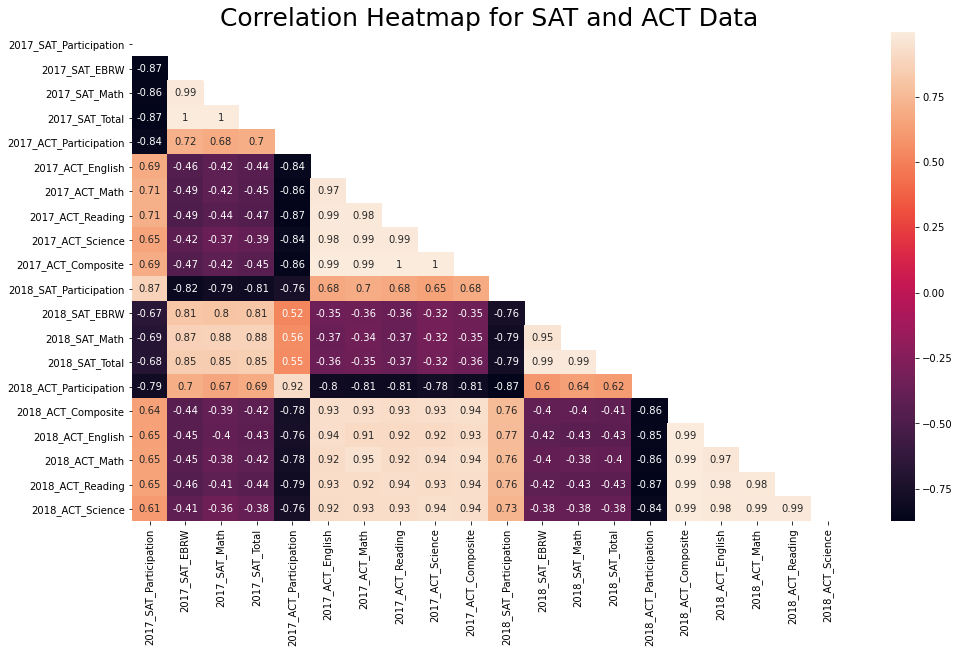

In [70]:
# Set figure size
plt.figure(figsize=(16,9))

# Get corr from final_df
corr = final_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True).set_title('Correlation Heatmap for SAT and ACT Data',fontsize = 25);

Observations:
- Mean scores are negatively correlated with participation rate of the same test (~ -0.87). Lower participation yields higher mean scores, this could be that only the more confident students are taking the tests.
- Mean scores and Total scores within the same test are positively correlated (~ 0.95 to 1). 
- Mean scores of one test is negatively correlated to the other test (~ -0.4).
- Participation rate of one test is positively correlated with mean scores for the other test (~ 0.7).
***

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [71]:
# Function to plot multiple histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    """ 
    Function to plot multiple histograms. 
  
    Parameters: 
		dataframe (Dateframe): Dateframe that is holding all the data
        list_of_columns (list): List of columns that needs to be plotted
        list_of_titles (list): List titles for the histograms
        list_of_xlabels (list): List of labels for the histogram's x-axis
        list_of_ylabels (list): List of labels for the histogram's y-axis
  
    Returns: 
		None  
  
    """
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,6*nrows)) # 8*nrows to adjust the fig according to rows
    ax = ax.ravel()
    col_color = ['royalblue', 'seagreen'] # Predefine colors for plot
    
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], color=col_color[('ACT' in column)]) # Assign color by SAT or ACT
        ax[i].set_title(list_of_titles[i], fontsize = 20)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 12)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        ax[i].axvline(dataframe[column].median(), label="median", color='darkred', linewidth=1)
        ax[i].axvline(dataframe[column].mean(), label="mean", color='k', linewidth=1)
        ax[i].legend(loc='upper center')
        
        # delete the last subplot is odd number of plots are required
    if len(list_of_columns)%2:
        fig.delaxes(ax[len(list_of_columns)])
    return

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### Participation rates plots for SAT & ACT

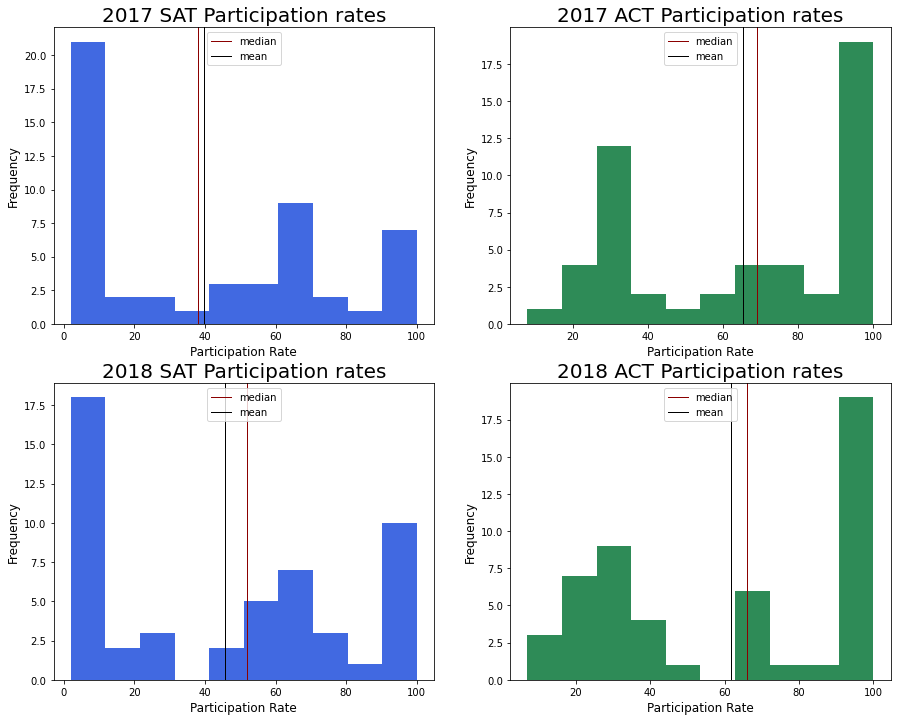

In [72]:
# Histograms for Praticipation rates
# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = ['2017_SAT_Participation', '2017_ACT_Participation', '2018_SAT_Participation', '2018_ACT_Participation']
titles = ['2017 SAT Participation rates', '2017 ACT Participation rates', '2018 SAT Participation rates', '2018 ACT Participation rates']
xlabels = ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']
ylabels = ['Frequency','Frequency','Frequency','Frequency']

subplot_histograms(final_df, cols, titles, xlabels, ylabels)

- The plots for both SAT and AST participation rate did not show huge changes from 2017 to 2018. The mean and median lines show slight improvement for SAT's participation, on the ACT end the changes there were marginal. From the mean lines we can see that ACT's center is significantly higher than that of the SAT. 
- SAT plots shows a large group below 10% which is consistent to what we have seen earlier when looking at highest and lowest SAT participant rates for states.
- ACT plots on other hand shows a large group with 100% participant which is also consistent to what we have seen earlier.

***

#### Math scores plots for SAT & ACT

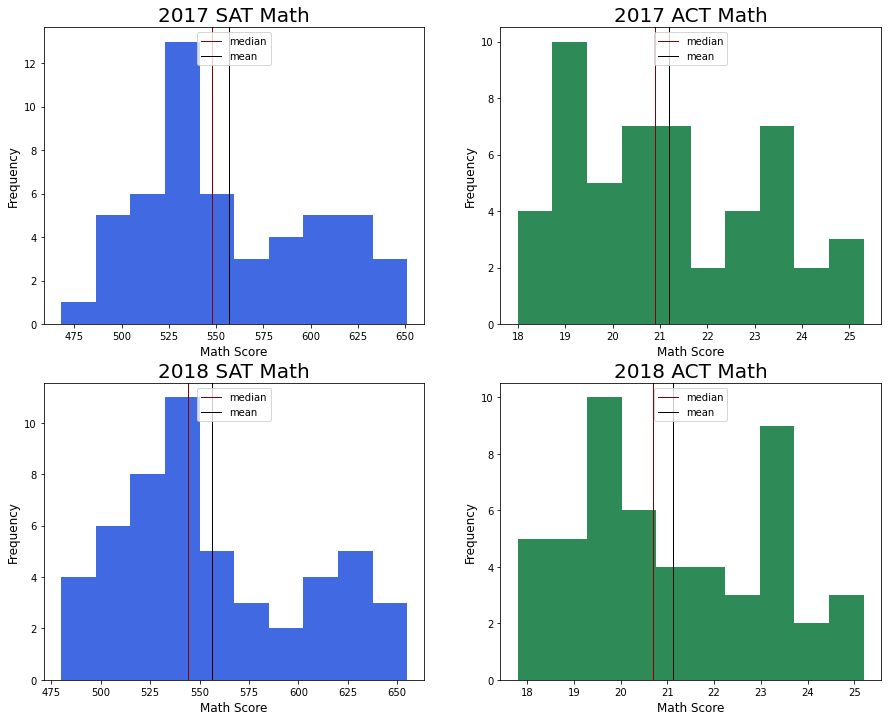

In [73]:
# Histograms for Math score
# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = ['2017_SAT_Math', '2017_ACT_Math', '2018_SAT_Math', '2018_ACT_Math']
titles = ['2017 SAT Math', '2017 ACT Math', '2018 SAT Math', '2018 ACT Math']
xlabels = ['Math Score', 'Math Score', 'Math Score', 'Math Score']
ylabels = ['Frequency', 'Frequency', 'Frequency', 'Frequency']

subplot_histograms(final_df, cols, titles, xlabels, ylabels)

The plots for both SAT and ACT share a fairly similar distribution that is slightly bimodal. 
- For SAT the first peak at around ~530 for both years and a second lower peak at ~600.
- The ACT plots looks fairly similar to SAT, with it's first peak at ~19 and the second ~23.
- In both tests, the second peak could be cause by the states with low participation rate scoring high in Math.

***

#### English scores plots for SAT & ACT

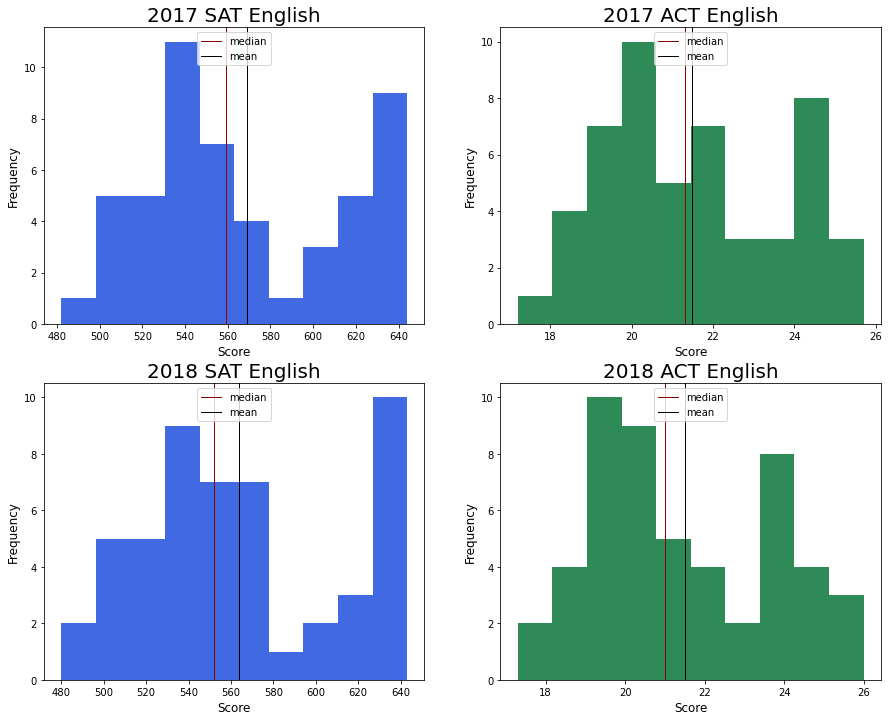

In [74]:
# Histograms for Reading/verbal scores
# As SAT does not split the reading and writing scores
# It'll be a better comparison if we merge the reading and english scores as well
final_df['2017_ACT_EnglishAve'] = round((final_df['2017_ACT_Reading']+final_df['2017_ACT_English'])/2, 1)
final_df['2018_ACT_EnglishAve'] = round((final_df['2018_ACT_Reading']+final_df['2018_ACT_English'])/2, 1)

# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = ['2017_SAT_EBRW', '2017_ACT_EnglishAve', '2018_SAT_EBRW', '2018_ACT_EnglishAve']
titles = ['2017 SAT English', '2017 ACT English', '2018 SAT English', '2018 ACT English']
xlabels = ['Score', 'Score', 'Score', 'Score']
ylabels = ['Frequency', 'Frequency', 'Frequency', 'Frequency']

subplot_histograms(final_df, cols, titles, xlabels, ylabels)

Similar to the plots for Math both SAT and ACT English score plots are showing 2 peaks.
***

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [75]:
# Function to plot multiple scatter plots.
def subplot_scatter(dataframe, list_of_col_pairs, list_of_titles, list_of_xlabels, list_of_ylabels):
    """ 
    Function to plot multiple scatter plots. 
  
    Parameters: 
		dataframe (Dateframe): Dateframe that is holding all the data
        list_of_col_pairs (list): List of columns pairs that are to be plotted in the scatter plot
        list_of_titles (list): List titles for the scatter plot
        list_of_xlabels (list): List of labels for the scatter plot's x-axis
        list_of_ylabels (list): List of labels for the scatter plot's y-axis
  
    Returns: 
		None  
  
    """
    nrows = int(np.ceil(len(list_of_col_pairs)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,8*nrows))
    ax = ax.ravel()

    for i, column in enumerate(list_of_col_pairs): 
        ax[i].scatter(dataframe[column[0]], dataframe[column[1]])
        ax[i].set_title(list_of_titles[i], fontsize = 20)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 12)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        
        # apply Median lines
        ax[i].axvline(dataframe[column[0]].median(),\
                label=f'{list_of_xlabels[i]} Median', color='green', linestyle='--')
        ax[i].axhline(dataframe[column[1]].median(),\
                label=f'{list_of_ylabels[i]} Median', color='black', linestyle='-.')
        
        # apply a trend line
        z = np.polyfit(dataframe[column[0]], dataframe[column[1]], 1)
        p = np.poly1d(z)
        ax[i].plot(dataframe[column[0]],p(dataframe[column[0]]), "r--", label='Trend line')
        ax[i].legend(loc='upper center')
    
    # delete the last subplot is odd number of plots are required
    if len(list_of_col_pairs)%2:
        fig.delaxes(ax[len(list_of_col_pairs)])
    return

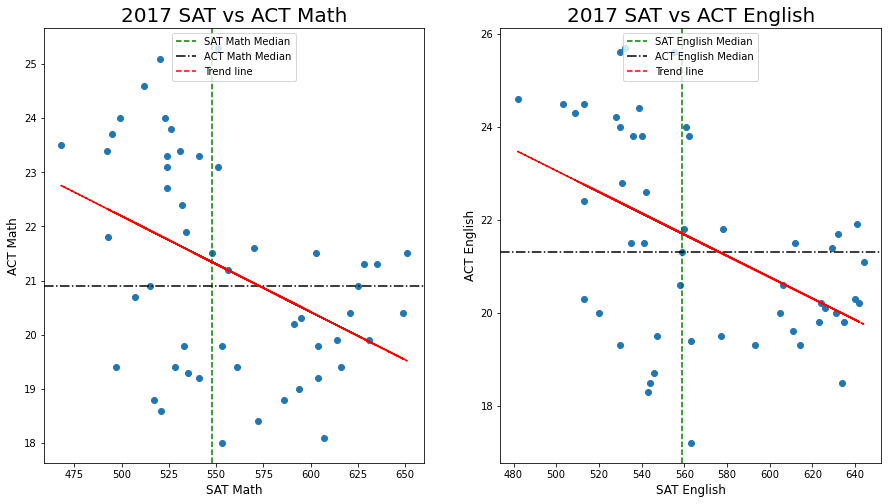

In [76]:
# Scatter plot for Math and Reading/verbal scores
# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = [['2017_SAT_Math', '2017_ACT_Math'], ['2017_SAT_EBRW', '2017_ACT_EnglishAve']]
titles = ['2017 SAT vs ACT Math', '2017 SAT vs ACT English']
xlabels = ['SAT Math', 'SAT English']
ylabels = ['ACT Math', 'ACT English']

subplot_scatter(final_df, cols, titles, xlabels, ylabels)

The points in both scatter plots are too spread out, the pattern could have occurred from random chance, and no relationship is demonstrated.
 
***

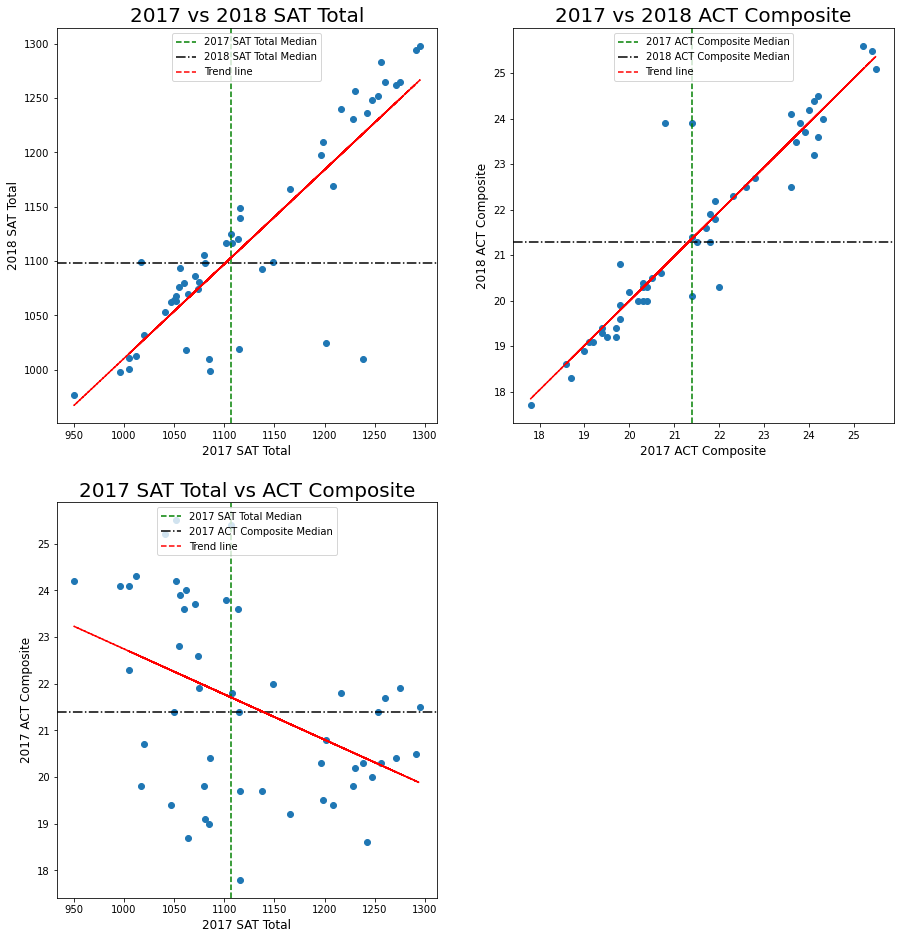

In [77]:
# Scatter plot for the following:
# Total scores for SAT 2017 vs. 2018
# Composite scores for ACT 2017 vs. 2018
# SAT vs. ACT total/composite scores for 2017
# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = [['2017_SAT_Total', '2018_SAT_Total'], ['2017_ACT_Composite', '2018_ACT_Composite'], ['2017_SAT_Total', '2017_ACT_Composite']]
titles = ['2017 vs 2018 SAT Total', '2017 vs 2018 ACT Composite', '2017 SAT Total vs ACT Composite']
xlabels = ['2017 SAT Total', '2017 ACT Composite', '2017 SAT Total']
ylabels = ['2018 SAT Total', '2018 ACT Composite', '2017 ACT Composite']

subplot_scatter(final_df, cols, titles, xlabels, ylabels)

The scatter plot between 2017 and 2018 SAT Total score, shows a strong positive linear relationship. There are a a few exceptions where the scores took a dive in 2018, top 2 on this list are Utah and Colorado.

Similar to the SAT, the plot for 2017 and 2018 ACT Composite shows a strong positive linear relationship as well. 

As for the plot between SAT Total against ACT Composite, no relationship is demonstrated.
***


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

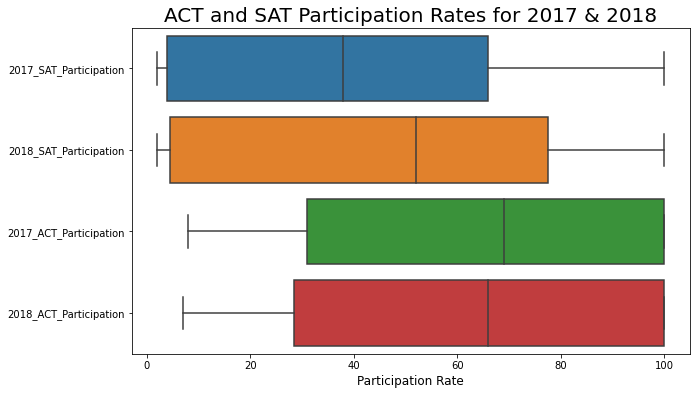

In [78]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
part_rate = final_df[['2017_SAT_Participation','2018_SAT_Participation','2017_ACT_Participation','2018_ACT_Participation']]

plt.figure(figsize=(10,6))
plt.title('ACT and SAT Participation Rates for 2017 & 2018', fontsize = 20)
plt.xlabel('Participation Rate', fontsize = 12)
sns.boxplot(data=part_rate, orient='h');

From the box plot above, we can see that ACT for both years are centered significantly higher than that of SAT.
***

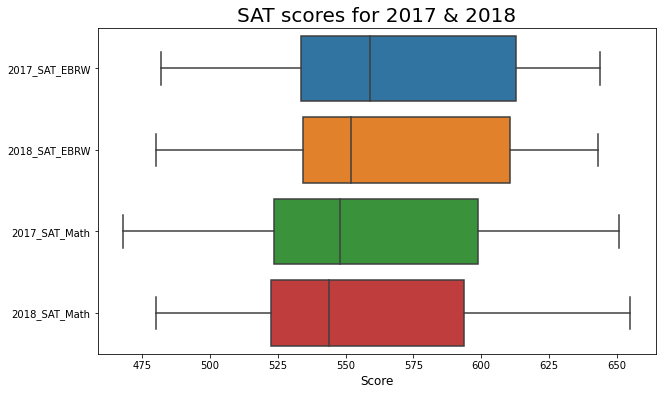

In [79]:
#Boxplot for SAT score across 2017 and 2018
part_rate = final_df[['2017_SAT_EBRW','2018_SAT_EBRW', '2017_SAT_Math','2018_SAT_Math']]

plt.figure(figsize=(10,6))
plt.title('SAT scores for 2017 & 2018', fontsize = 20)
plt.xlabel('Score', fontsize = 12)
sns.boxplot(data=part_rate, orient='h');

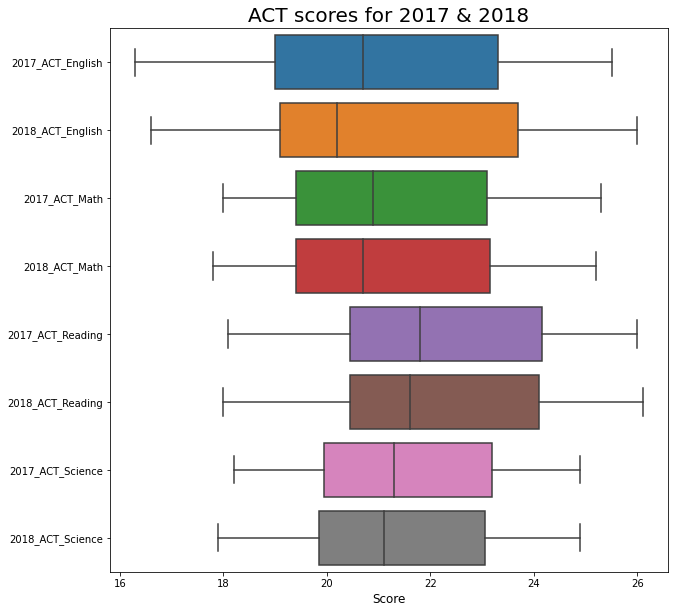

In [80]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
part_rate = final_df[['2017_ACT_English','2018_ACT_English', '2017_ACT_Math','2018_ACT_Math',\
                     '2017_ACT_Reading', '2018_ACT_Reading', '2017_ACT_Science', '2018_ACT_Science']]

plt.figure(figsize=(10,10))
plt.title('ACT scores for 2017 & 2018', fontsize = 20)
plt.xlabel('Score', fontsize = 12)
sns.boxplot(data=part_rate, orient='h');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Plotting the 2107 SAT participation rate into a histogram

In [81]:
sat_ctry_2017 = final_df.sort_values(by=['2017_SAT_Participation'], ascending = False)[['State', '2017_SAT_Participation']]
sat_ctry_2017 = sat_ctry_2017.set_index('State')

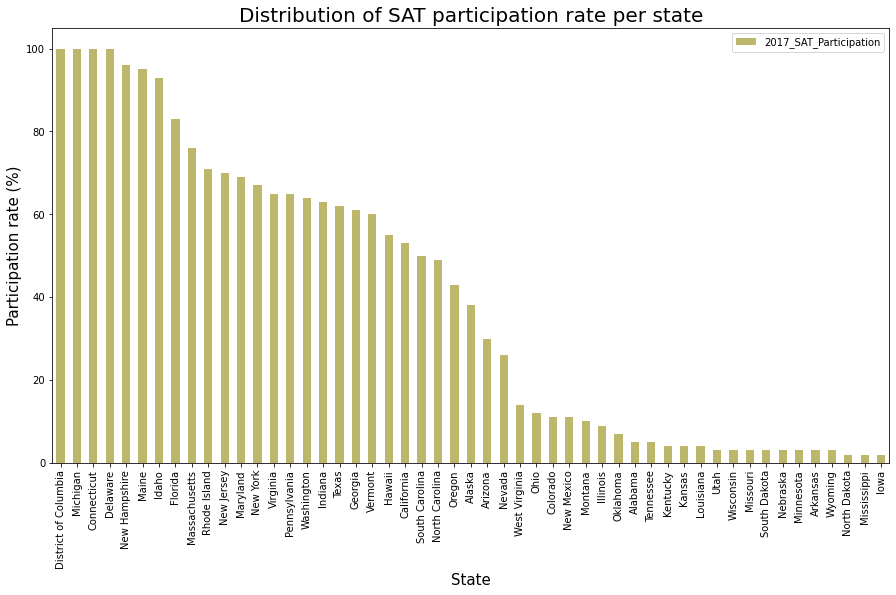

In [82]:
sat_ctry_2017.plot(kind='bar', figsize=(15,8), color='darkkhaki'); 
plt.xlabel('State', fontsize=15);
plt.ylabel('Participation rate (%)', fontsize=15);
plt.title('Distribution of SAT participation rate per state', fontsize=20);

In [83]:
final_df[final_df['State'].isin(['Iowa', 'Mississippi', 'North Dakota', 'Missouri', 'Utah'])]\
[['State','2017_SAT_Participation','2018_SAT_Participation','2017_ACT_Participation','2018_ACT_Participation']]


State  2017_SAT_Participation  2018_SAT_Participation  \
15          Iowa                       2                       3   
24   Mississippi                       2                       3   
25      Missouri                       3                       4   
34  North Dakota                       2                       2   
44          Utah                       3                       4   

    2017_ACT_Participation  2018_ACT_Participation  
15                      67                      68  
24                     100                     100  
25                     100                     100  
34                      98                      98  
44                     100                     100

Zooming into the 5 states with lowest participation rates, these are Iowa, Mississippi, Missouri, North Dakota and Utah.
These states have SAT participation rates below 5% for both years.

***

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [84]:
# Function to summarize distribution. 
def summarize(df, col, title, xlabel, ylabel):
    """ 
    Function to summarize distribution. 
  
    Parameters: 
		df (Dateframe): Dateframe that is holding all the data
        col (str): Column that needs to be plotted
        title (str): Titles for the histogram
        xlabel (str): Label for the histogram's x-axis
        ylabel (str): Label for the histogram's y-axis
    Returns: 
		None  
  
    """
    subplot_histograms(df, [col], [title], [xlabel], [ylabel])
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    cv = int((std/mean)*100)
    # print summary of the distribution
    print(f"Summary for {col} \nmean:\t{mean:.2f}, \nmedian:\t{median:.2f}, \nstd:\t{std:.2f}.")
    if mean > median:
        print(f"This distribution is skewed to the right")
    elif mean < median:
        print(f"This distribution is skewed to the left")
    else:
        print(f"This distribution is symetrically distributed")
    
    # assuming coefficient of variation of 30 and below are acceptable
    # and in this case considered 
    if cv <= 30:  
        print(f"CV of {cv}%, the spread of this distribution is small")
    else:
        print(f"CV of {cv}%, the spread of this distribution is big")
    return

#### Summarizing Distribution for SAT Participation

Summary for 2017_SAT_Participation 
mean:	39.80, 
median:	38.00, 
std:	35.28.
This distribution is skewed to the right
CV of 88%, the spread of this distribution is big


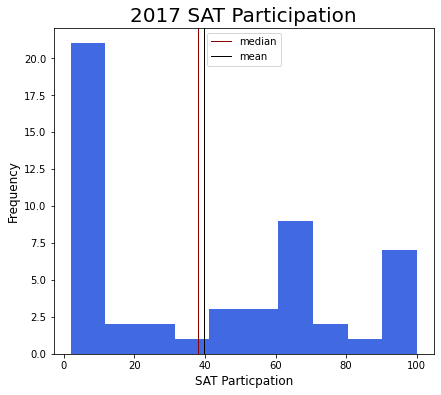

In [85]:
# Plotting the distribution for SAT Participation
summarize(final_df, '2017_SAT_Participation', '2017 SAT Participation', 'SAT Particpation', 'Frequency')

##### Summarizing Distribution for SAT Participation 
This distribution has 3 peaks, with the highest peak at ~3, second peak at ~60 and finally at ~90. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly big, that would mean a big spread. <br>
***

#### Summarizing Distribution for SAT English score

Summary for 2017_SAT_EBRW 
mean:	569.12, 
median:	559.00, 
std:	45.67.
This distribution is skewed to the right
CV of 8%, the spread of this distribution is small


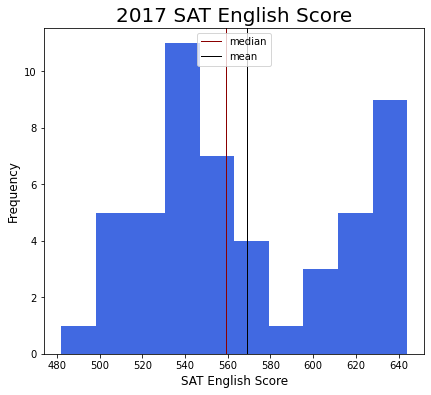

In [86]:
# Plotting the distribution for SAT English score
summarize(final_df, '2017_SAT_EBRW', '2017 SAT English Score', 'SAT English Score', 'Frequency')

##### Summarizing Distribution for SAT English score 
This distribution is bimodal, with the first peak at ~535 and second one at ~635. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for SAT Math score

Summary for 2017_SAT_Math 
mean:	556.88, 
median:	548.00, 
std:	47.12.
This distribution is skewed to the right
CV of 8%, the spread of this distribution is small


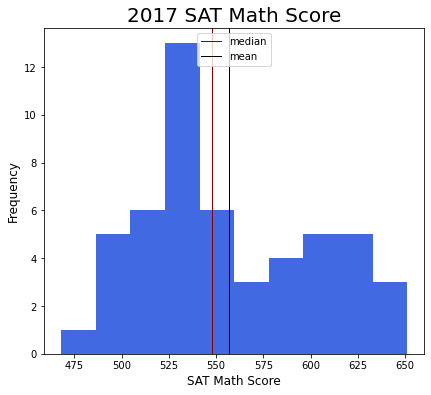

In [87]:
# Plotting the distribution for SAT Math score
summarize(final_df, '2017_SAT_Math', '2017 SAT Math Score', 'SAT Math Score', 'Frequency')

##### Summarizing Distribution for SAT Math score 
This distribution has 2 peaks, the first peak at ~535 and a second lower peak at ~600. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for SAT Total score

Summary for 2017_SAT_Total 
mean:	1126.10, 
median:	1107.00, 
std:	92.49.
This distribution is skewed to the right
CV of 8%, the spread of this distribution is small


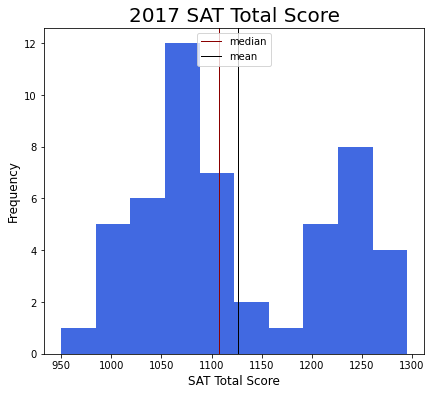

In [88]:
# Plotting the distribution for SAT Total score
summarize(final_df, '2017_SAT_Total', '2017 SAT Total Score', 'SAT Total Score', 'Frequency')

#### Summarizing Distribution for SAT Total score
This distribution has 2 peaks, the first peak at ~1060 and a second lower peak at ~1230. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for ACT Participation rate

Summary for 2017_ACT_Participation 
mean:	65.25, 
median:	69.00, 
std:	32.14.
This distribution is skewed to the left
CV of 49%, the spread of this distribution is big


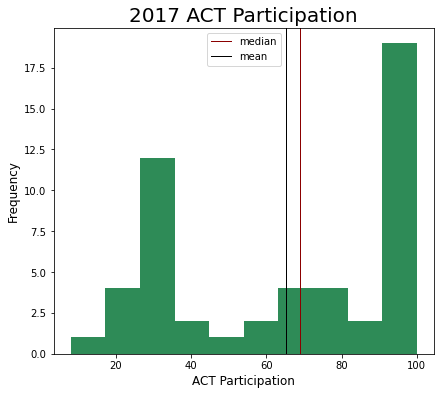

In [89]:
# Plotting the distribution for ACT Participation
summarize(final_df, '2017_ACT_Participation', '2017 ACT Participation', 'ACT Participation', 'Frequency')

#### Summarizing Distribution for ACT Participation rate
This distribution has 2 peaks, the first peak at ~30 and a second higher peak at ~95. <br>
Based on the mean and median this distribution is skewed to the left. <br>
The standard deviation is fairly big, that would mean the spread is big. <br>
***

#### Summarizing Distribution for ACT English score

Summary for 2017_ACT_English 
mean:	20.93, 
median:	20.70, 
std:	2.35.
This distribution is skewed to the right
CV of 11%, the spread of this distribution is small


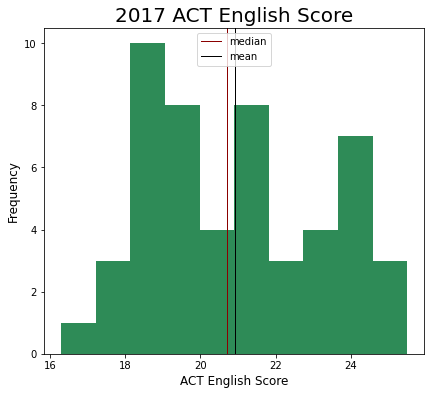

In [90]:
# Plotting the distribution for ACT English score
summarize(final_df, '2017_ACT_English', '2017 ACT English Score', 'ACT English Score', 'Frequency')

#### Summarizing Distribution for ACT English score
This distribution has 2 peaks, the first peak at ~18.5 and a second lower peak at ~24. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for ACT Math score

Summary for 2017_ACT_Math 
mean:	21.18, 
median:	20.90, 
std:	1.98.
This distribution is skewed to the right
CV of 9%, the spread of this distribution is small


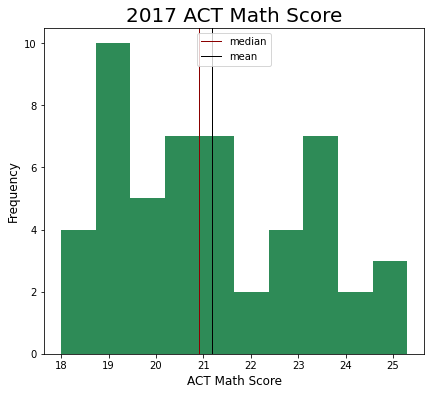

In [91]:
# Plotting the distribution for ACT Math score
summarize(final_df, '2017_ACT_Math', '2017 ACT Math Score', 'ACT Math Score', 'Frequency')

#### Summarizing Distribution for ACT Math score
This distribution has 2 peaks, the first peak at ~19 and a second lower peak at ~23. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for ACT Reading score

Summary for 2017_ACT_Reading 
mean:	22.01, 
median:	21.80, 
std:	2.07.
This distribution is skewed to the right
CV of 9%, the spread of this distribution is small


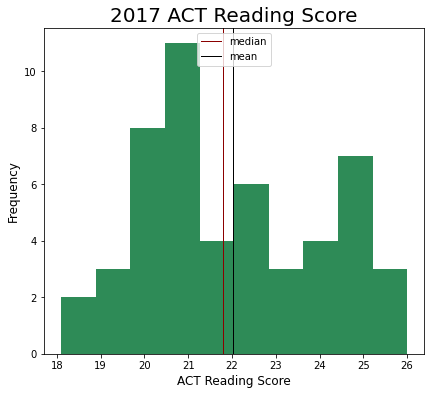

In [92]:
# Plotting the distribution for ACT Reading score
summarize(final_df, '2017_ACT_Reading', '2017 ACT Reading Score', 'ACT Reading Score', 'Frequency')

#### Summarizing Distribution for ACT Reading score
This distribution has 2 peaks, the first peak at ~20.5 and a second lower peak at ~24.5. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for ACT Science score

Summary for 2017_ACT_Science 
mean:	21.45, 
median:	21.30, 
std:	1.74.
This distribution is skewed to the right
CV of 8%, the spread of this distribution is small


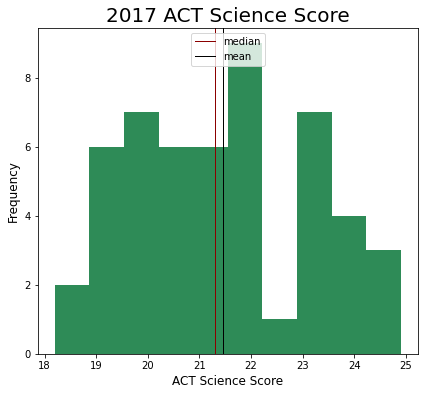

In [93]:
# Plotting the distribution for ACT Science score
summarize(final_df, '2017_ACT_Science', '2017 ACT Science Score', 'ACT Science Score', 'Frequency')

#### Summarizing Distribution for ACT Science score
This distribution is concentrated at ~18 to 25. <br>
Based on the mean and median this distribution is skewed to the left. <br>
The standard deviation is small, that would mean the spread is small. <br>
***

#### Summarizing Distribution for ACT Composite score

Summary for 2017_ACT_Composite 
mean:	21.52, 
median:	21.40, 
std:	2.02.
This distribution is skewed to the right
CV of 9%, the spread of this distribution is small


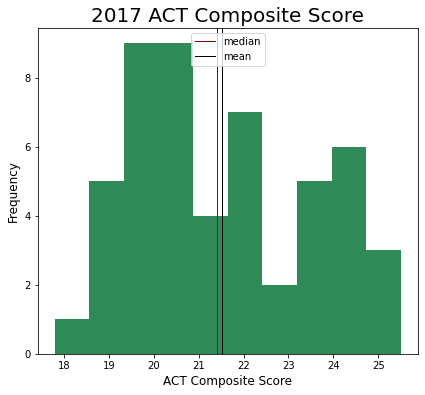

In [94]:
# Plotting the distribution for ACT Composite score
summarize(final_df, '2017_ACT_Composite', '2017 ACT Composite Score', 'ACT Composite Score', 'Frequency')

#### Summarizing Distribution for ACT Composite score
This distribution has 2 peaks, the first peak at ~19.5 and a second lower peak at ~24.5. <br>
Based on the mean and median this distribution is skewed to the right. <br>
The standard deviation is fairly small, that would mean the spread is small. <br>
***


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

No, not for this dataset. Most of the distributions are bimodal. The second peak could be due to selection bias caused by the states with low participation rate getting the highest scores.
***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Yes, the assumption holds for the Math and Reading. As the low participation states with higher scores will skew the distributions.

As for participation rates the distributions are not normally distributed as well.<br>
As the rates tend to cluster at both extremes, this is reflection of the test being mandated in the states. 
***

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

No, doesn't make sense as both participation rates do not follow a Normal distribution. <br>
Statistical inference comparisons that reply on Normal distribution will not be valid for these variables.
***

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

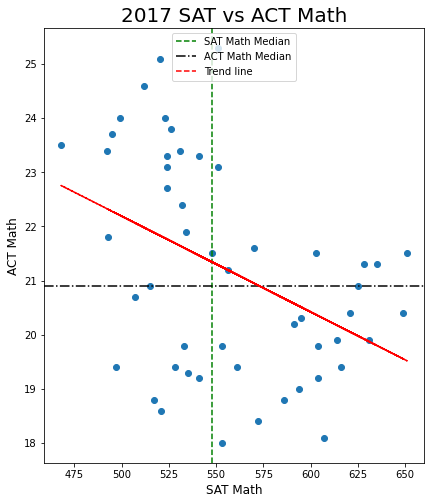

In [95]:
# Scatter plot for Math scores
# Initializing the values before passing into function for easy reading and troubleshooting of code
cols = [['2017_SAT_Math', '2017_ACT_Math']]
titles = ['2017 SAT vs ACT Math']
xlabels = ['SAT Math']
ylabels = ['ACT Math']

subplot_scatter(final_df, cols, titles, xlabels, ylabels)

In [96]:
final_df[['2017_SAT_Math','2017_ACT_Math']].corr()

2017_SAT_Math  2017_ACT_Math
2017_SAT_Math         1.0000        -0.4205
2017_ACT_Math        -0.4205         1.0000

Answer:

Although the correlation of -0.42 shows that there is a weak negative correlation. <br>
When we look back at the scatter plot, it doesn't indicate a linear relationship. <br>
Without a linear relationship, the correlation doesn't make sense because correlation only applies to linear relationships. <br>
Therefore the answer is, No.

***


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

H0: mean ACT participation = mean SAT participation <br>
HA: mean ACT participation != mean SAT participation

Significance level α=0.05 Assuming the variables are independent.

In [97]:
# T-Test
stats.ttest_ind(final_df['2017_SAT_Participation'], final_df['2017_ACT_Participation'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

pvalue < α=0.05, therefore we can reject H0
***

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [98]:
# list of ACT and SAT states taken from https://www.testive.com/state-sat-act/
act_states = ['Alabama', 'Hawaii', 'Idaho', 'Kentucky', 'Louisiana', \
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', \
              'North Carolina', 'North Dakota', 'Ohio', 'South Carolina', \
              'Tennessee', 'Utah', 'Wisconsin', 'Wyoming' ]

sat_states = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', \
              'Idaho', 'Illinois', 'Maine', 'Michigan', \
              'New Hampshire', 'Ohio', 'Tennessee' ]

# filter out ACT mandated states 
state_part = final_df[(~final_df['State'].isin(act_states)) & (~final_df['State'].isin(sat_states))].copy()
# filter other columns except participation rates
state_part = state_part[['State', '2017_SAT_Participation', '2018_SAT_Participation',\
                         '2017_ACT_Participation', '2018_ACT_Participation']]

# Look at states with SAT participation rate below 20% and
# ACT participation rate below 70%
state_part = state_part.set_index('State')
state_part[(state_part['2017_SAT_Participation']<20) &\
           (state_part['2018_ACT_Participation']<70)]\
            .sort_values('2017_SAT_Participation')

2017_SAT_Participation  2018_SAT_Participation  \
State                                                           
Iowa                                2                       3   
New Mexico                         11                      16   
West Virginia                      14                      28   

               2017_ACT_Participation  2018_ACT_Participation  
State                                                          
Iowa                               67                      68  
New Mexico                         66                      67  
West Virginia                      69                      65

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?



### Identifying Target State for SAT Growth

Out of the 3 states identified in the previous section, West Virginia would be one state for College Board to focus on.
Reason is that West Virginia has mandated SAT test as of 2017, but the participation rate is still very low.
With SAT as the mandated test, it does give this state a lot of potential to increase.

##### Possible ways to improve participation rate
- Mandating the completion of SAT for all high school students.
- Fee Waivers to cover test registration costs
- "SAT School Day" to make student participation as convenient as possible.

***

